In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
import os
import pickle 

In [4]:
data=pd.read_csv("dataset/crop_yield.csv")
data = data.sample(frac=0.2, random_state=1)

In [3]:
data.head()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
276826   West      Loam  Soybean   580.119883            20.914138   
849425   East      Loam     Rice   213.558303            27.679976   
504499   East     Peaty     Rice   588.642204            21.920407   
601054   West     Peaty    Maize   760.369825            28.039795   
980221  South      Clay   Cotton   457.698017            29.259726   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
276826             True            False             Rainy               74   
849425             True             True             Sunny               79   
504499             True             True             Sunny               69   
601054             True            False             Sunny              111   
980221             True            False            Cloudy               70   

        Yield_tons_per_hectare  
276826                5.522041  
849425                4.469901  
504499                6.341938  
601054                6.815897  
980221                4.109808

In [4]:
data.describe()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  200000.000000        200000.000000    200000.000000   
mean      549.711073            27.513237       104.437990   
std       259.537894             7.221205        25.948934   
min       100.006194            15.000034        60.000000   
25%       324.863406            21.266927        82.000000   
50%       549.079133            27.528811       104.000000   
75%       774.390286            33.762242       127.000000   
max       999.995204            39.999997       149.000000   

       Yield_tons_per_hectare  
count           200000.000000  
mean                 4.647432  
std                  1.696040  
min                 -0.731541  
25%                  3.415261  
50%                  4.645560  
75%                  5.876133  
max                  9.826285

In [5]:
# data.shape
data.info()
# data.dtypes
# data.count()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 276826 to 32132
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  200000 non-null  object 
 1   Soil_Type               200000 non-null  object 
 2   Crop                    200000 non-null  object 
 3   Rainfall_mm             200000 non-null  float64
 4   Temperature_Celsius     200000 non-null  float64
 5   Fertilizer_Used         200000 non-null  bool   
 6   Irrigation_Used         200000 non-null  bool   
 7   Weather_Condition       200000 non-null  object 
 8   Days_to_Harvest         200000 non-null  int64  
 9   Yield_tons_per_hectare  200000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 14.1+ MB


In [6]:
data.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [7]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [8]:
# Adding new column 'Value' where Value = Yield_tons_per_hectare * 1000
data['Value'] = data['Yield_tons_per_hectare'] * 1000

In [9]:
data.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare', 'Value'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

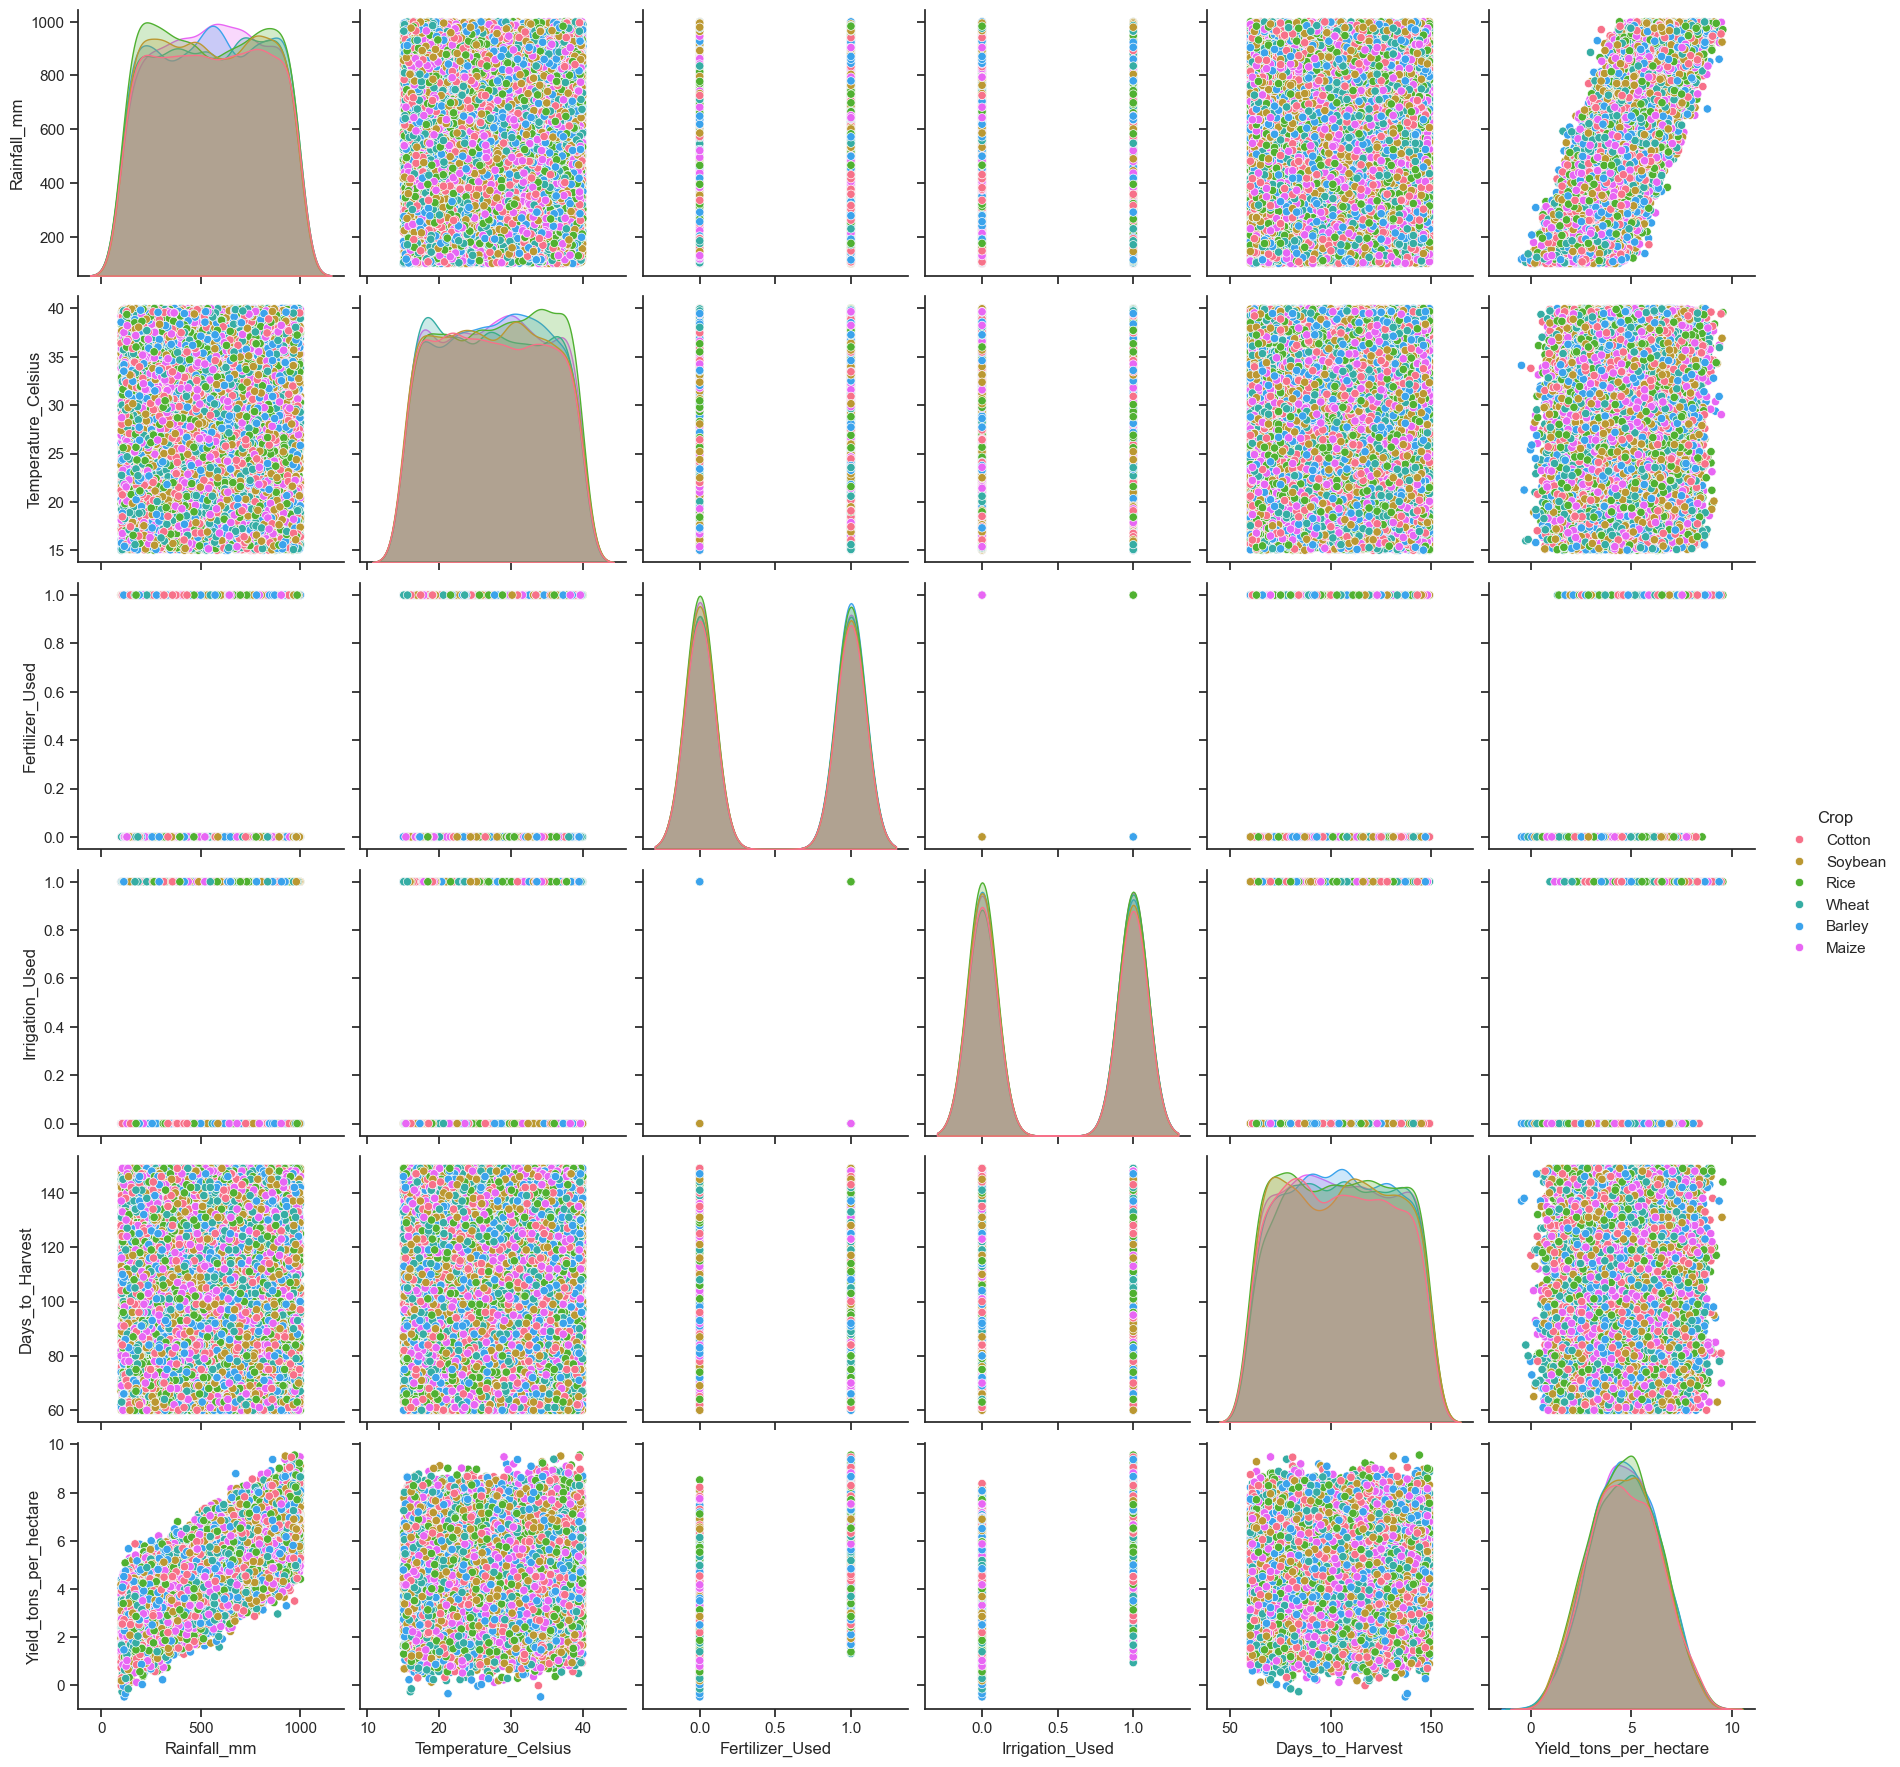

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="ticks")
sample_data = data.sample(frac=0.1, random_state=1)
# Create a pairplot with the specified customizations
plt.figure(figsize=(10, 6))
pairplot = sns.pairplot(
    sample_data,
    hue="Crop",               # Coloring by Crop type
    kind="scatter",           # Type of plot (scatter, reg, etc.)
    palette="husl",           # Color palette for different crops
    height=3,                 # Set the height of each subplot
    diag_kind="kde"           # Kernel density estimation for diagonal plots
)

# Display the pairplot
plt.show()

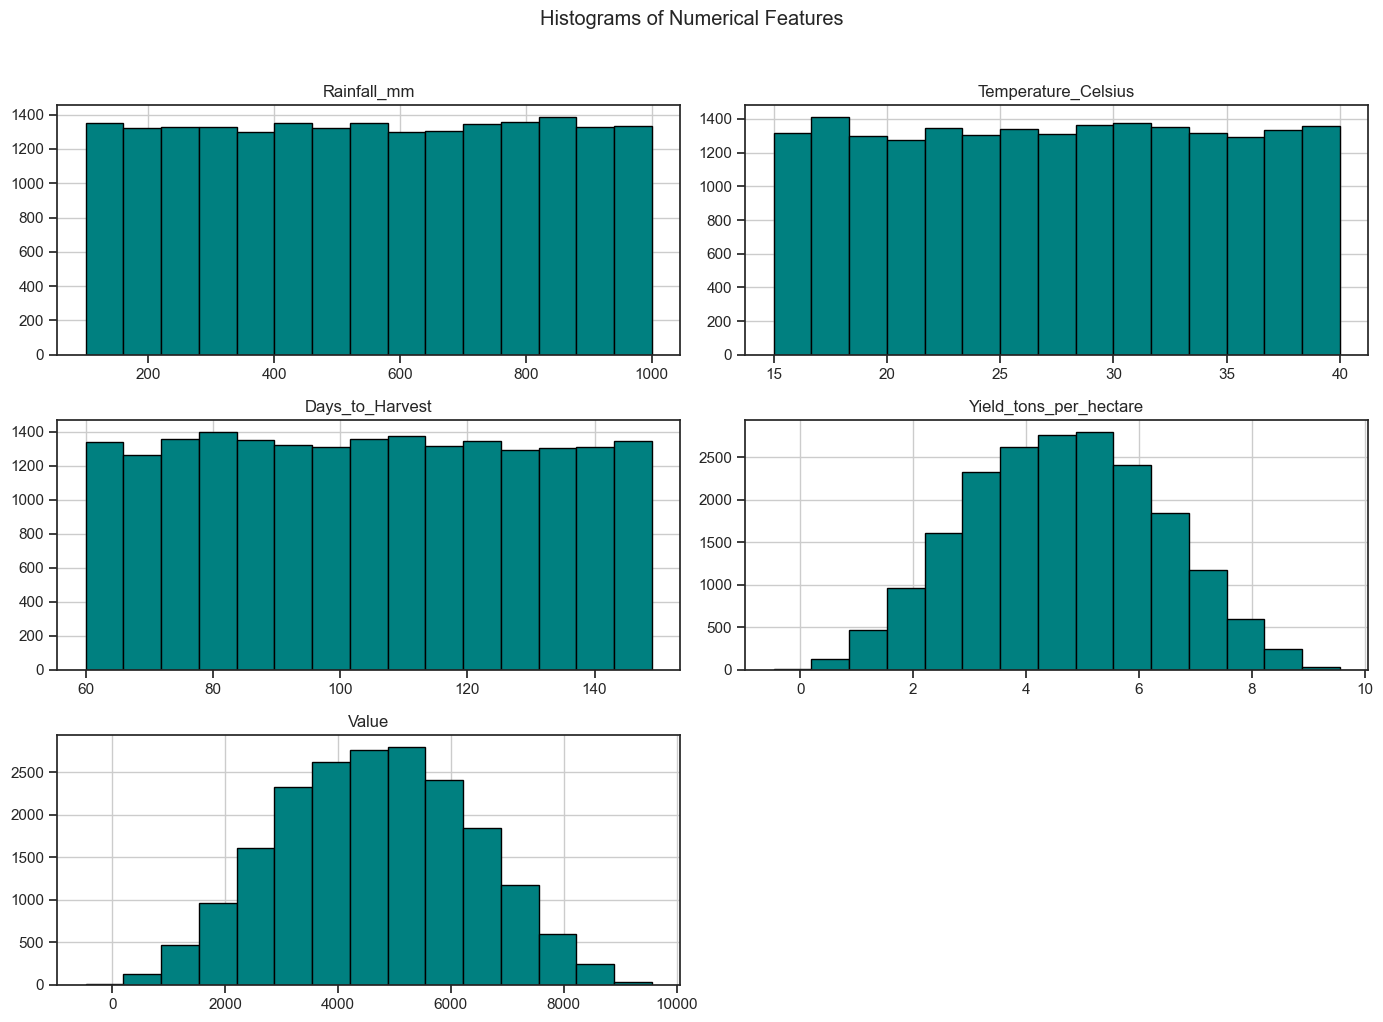

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Histogram for numerical variables
sample_data.hist(bins=15, figsize=(14, 10), color='teal', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()




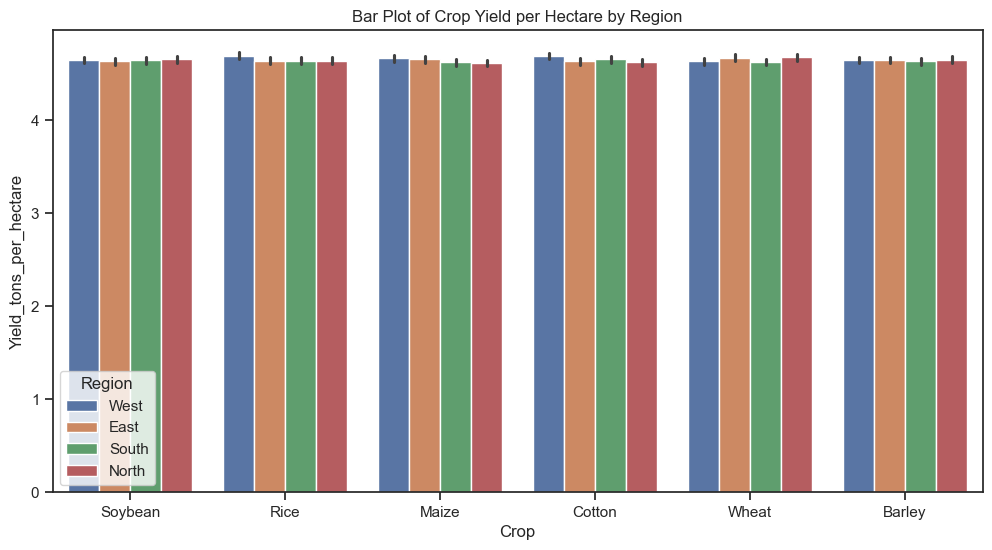

In [12]:
# 2. Bar Plot for categorical variables aggregated by crop yield
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Yield_tons_per_hectare', hue='Region', data=data)
plt.title('Bar Plot of Crop Yield per Hectare by Region')
plt.show()

c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

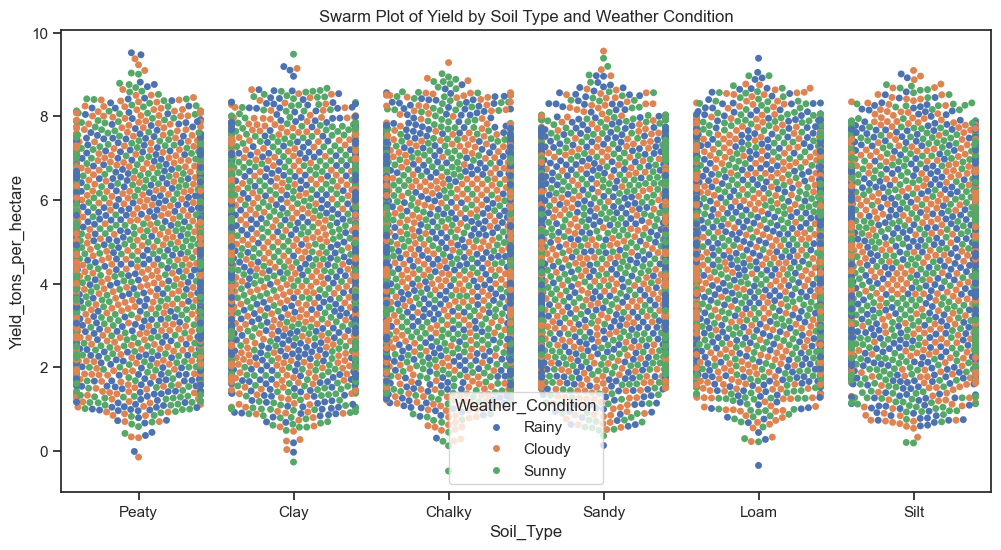

In [6]:
# 3. Swarm Plot to show distribution of Yield across Soil Types and Weather Conditions
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Soil_Type', y='Yield_tons_per_hectare', hue='Weather_Condition', data=sample_data)
plt.title('Swarm Plot of Yield by Soil Type and Weather Condition')
plt.show()


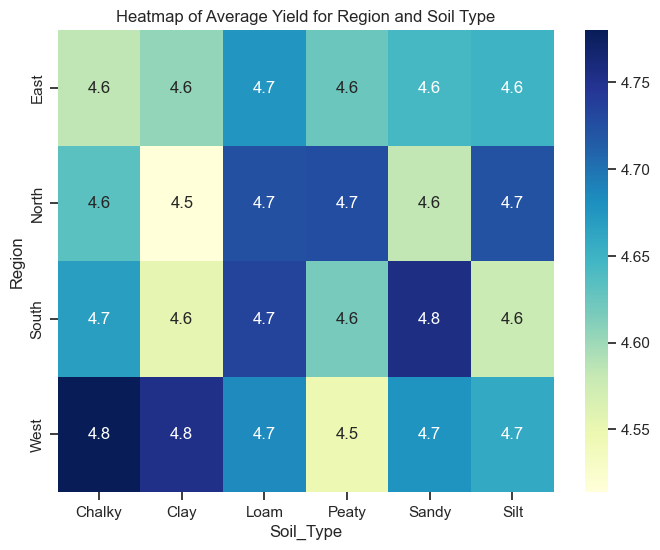

In [7]:
# 4. Heatmap of Categorical Variables using a Pivot Table for Region and Soil Type vs. Average Yield
pivot_table = sample_data.pivot_table(index='Region', columns='Soil_Type', values='Yield_tons_per_hectare', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Average Yield for Region and Soil Type')
plt.show()

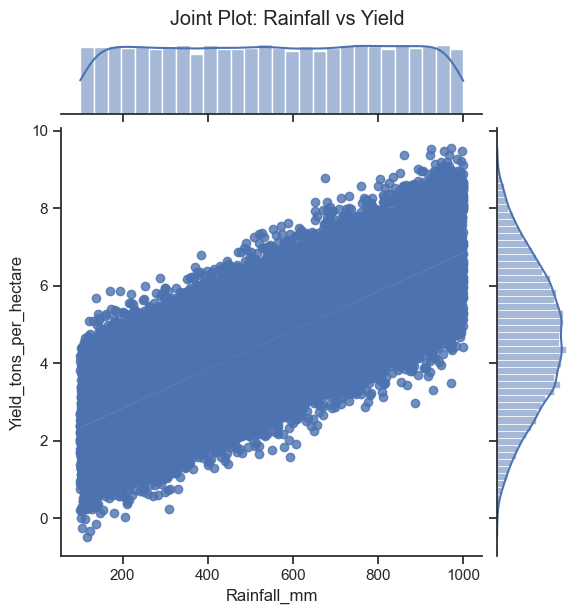

In [8]:
# 5. Joint Plot for Rainfall vs Yield
sns.jointplot(x='Rainfall_mm', y='Yield_tons_per_hectare', kind='reg', data=sample_data)
plt.suptitle("Joint Plot: Rainfall vs Yield", y=1.02)
plt.show()

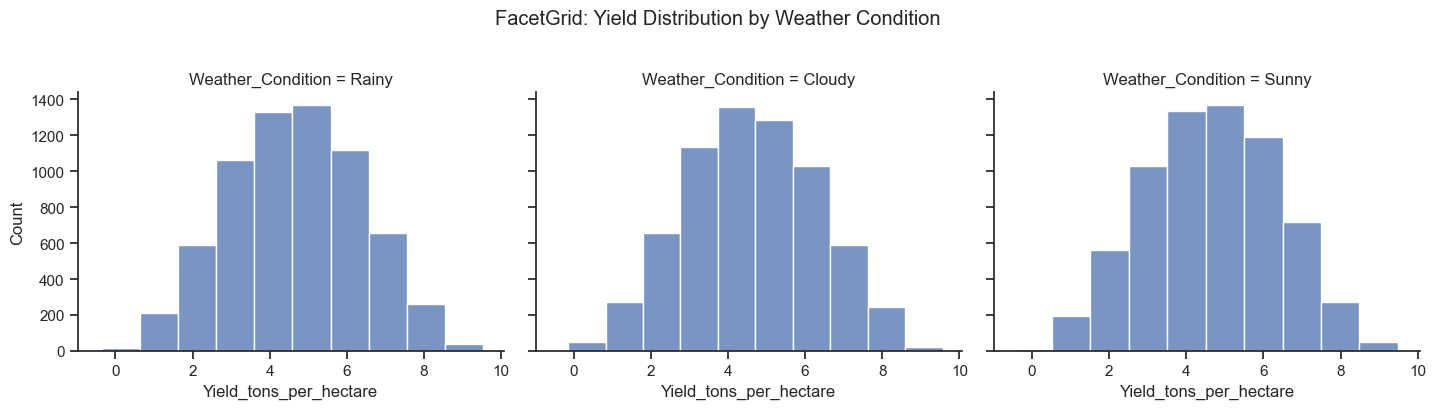

In [9]:
# 6. FacetGrid showing Yield distribution for each Crop, split by Weather Condition
g = sns.FacetGrid(sample_data, col="Weather_Condition", height=4, aspect=1.2)
g.map(sns.histplot, "Yield_tons_per_hectare", bins=10)
g.add_legend()
plt.suptitle("FacetGrid: Yield Distribution by Weather Condition", y=1.02)
plt.tight_layout()
plt.show()

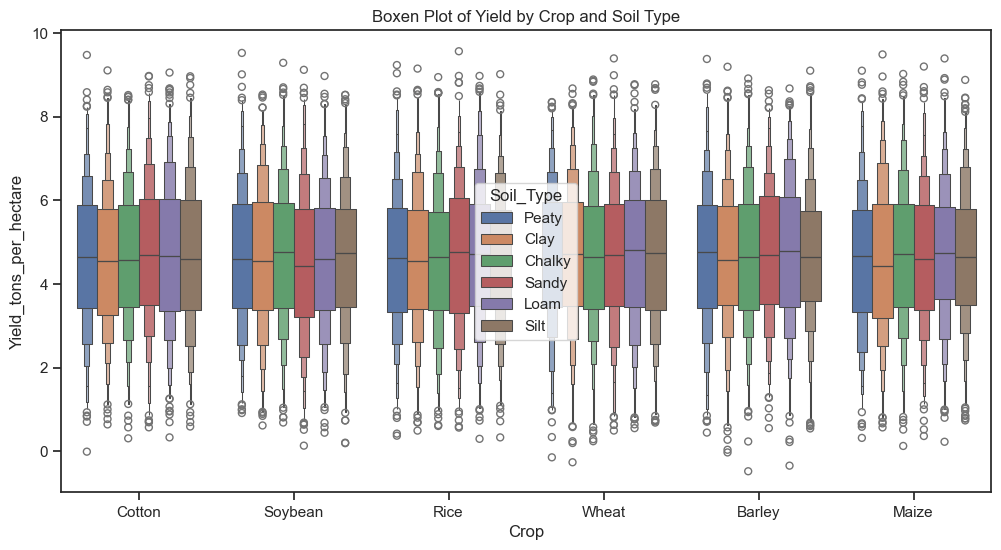

In [10]:
# 7. Boxen Plot for Yield based on Crop and Soil Type
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Crop', y='Yield_tons_per_hectare', hue='Soil_Type', data=sample_data)
plt.title('Boxen Plot of Yield by Crop and Soil Type')
plt.show()

1. HOW DOES SOIL TYPE AFFECT CROP YIELD?

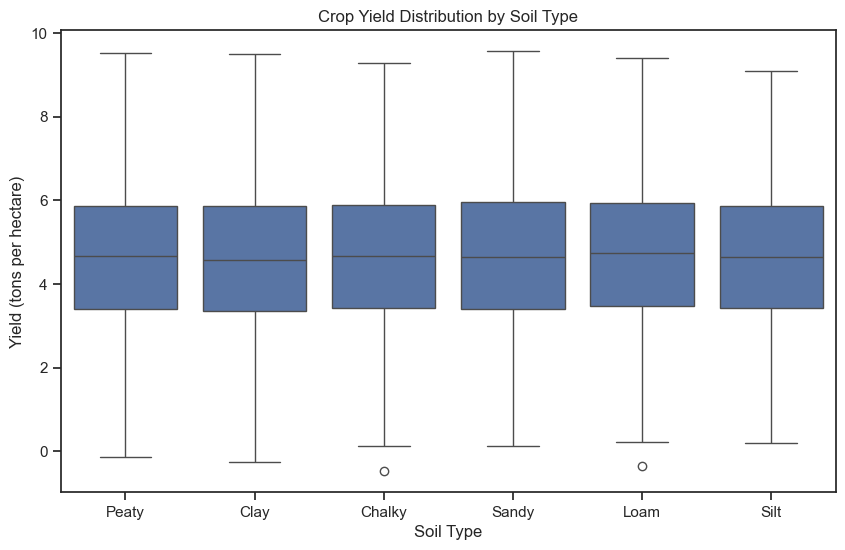

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Soil_Type', y='Yield_tons_per_hectare', data=sample_data)
plt.title('Crop Yield Distribution by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Yield (tons per hectare)')
plt.show()


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_18280\2185525216.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Soil_Type', y='Yield_tons_per_hectare', data=sample_data, estimator='mean', ci=None)


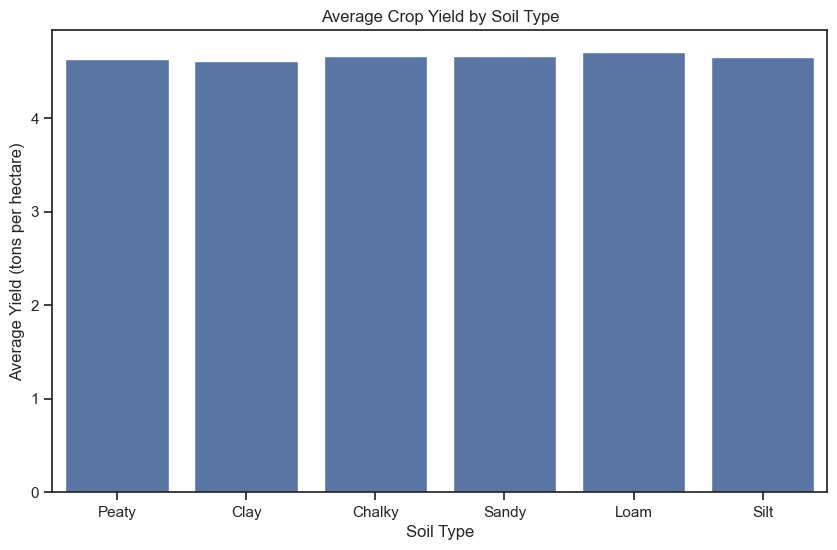

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Soil_Type', y='Yield_tons_per_hectare', data=sample_data, estimator='mean', ci=None)
plt.title('Average Crop Yield by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Average Yield (tons per hectare)')
plt.show()


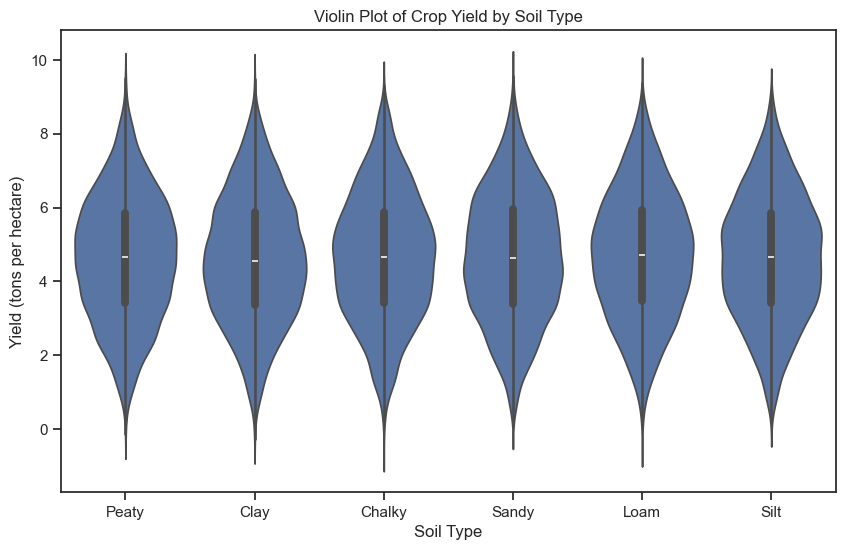

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Soil_Type', y='Yield_tons_per_hectare', data=sample_data)
plt.title('Violin Plot of Crop Yield by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Yield (tons per hectare)')
plt.show()


2. WHAT IS THE RELATIONSHIP BETWEEN RAINFALL AND CROP YIELD?
A LINEAR REGRESSION WILL BE RELEVANT TO ANSWER THIS QUESTION

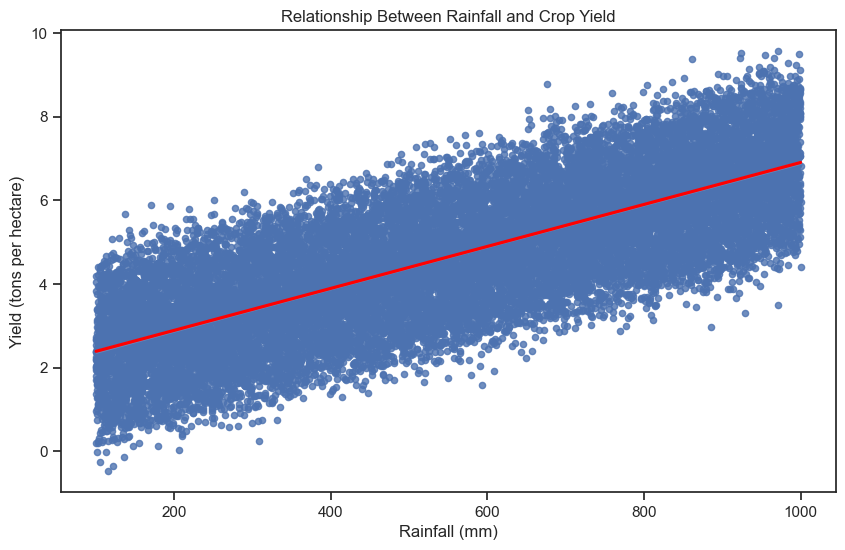

Pearson correlation coefficient between Rainfall and Crop Yield: 0.77


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=sample_data, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Relationship Between Rainfall and Crop Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.show()

# Calculate and print Pearson correlation
correlation, _ = pearsonr(sample_data['Rainfall_mm'], sample_data['Yield_tons_per_hectare'])
print(f"Pearson correlation coefficient between Rainfall and Crop Yield: {correlation:.2f}")


3. HOW DOES TEMPERATURE INFLUENCE CROP YIELD?
A MULTIPLE LINEAR REGRESSION MODEL IS RELEVANT HERE.

To investigate how temperature influences crop yield, we can build a Multiple Linear Regression Model where temperature is the key predictor variable. Additionally, other factors like rainfall, soil type, and fertilizer usage might also play a role, so we can include them as additional predictors to observe their combined influence on the crop yield.
Steps:
Preprocessing: Convert categorical variables into numerical representations using techniques like one-hot encoding.
Building the Multiple Linear Regression Model: Use features such as Temperature_Celsius, Rainfall_mm, Soil_Type, and Fertilizer_Used to predict the target variable Yield_tons_per_hectare.
Evaluate the Model: Check how much of the variation in crop yield is explained by temperature and other features by using metrics like the coefficient of determination (R²), p-values, and regression coefficients

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Convert the data to numeric to avoid issues
data_encoded = pd.get_dummies(sample_data, columns=['Soil_Type', 'Crop', 'Weather_Condition', 'Fertilizer_Used', 'Irrigation_Used'], drop_first=True)

# Check for missing values and handle them
data_encoded = data_encoded.dropna()  # Alternatively, you can use data_encoded.fillna() for imputation

# Ensure all columns are numeric
X = data_encoded[['Temperature_Celsius', 'Rainfall_mm', 'Soil_Type_Clay', 'Soil_Type_Sandy', 'Fertilizer_Used_True']].astype(float)
y = data_encoded['Yield_tons_per_hectare'].astype(float)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on test set
y_pred = model.predict(X_test)

# Summary of the model
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.791
Model:                                OLS   Adj. R-squared:                  0.791
Method:                     Least Squares   F-statistic:                 1.214e+04
Date:                    Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                            11:32:59   Log-Likelihood:                -18724.
No. Observations:                   16000   AIC:                         3.746e+04
Df Residuals:                       15994   BIC:                         3.751e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

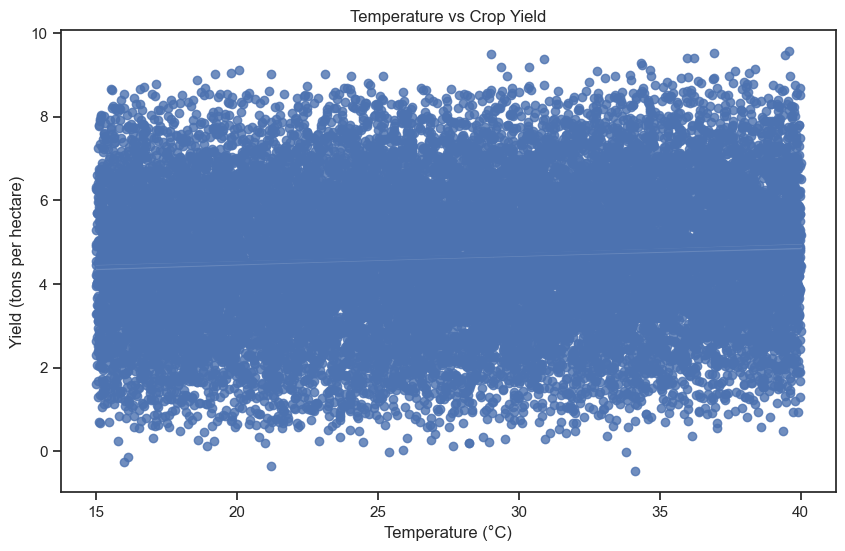

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Temperature vs. Yield with a regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Temperature_Celsius', y='Yield_tons_per_hectare', data=sample_data)
plt.title('Temperature vs Crop Yield')
plt.xlabel('Temperature (°C)')
plt.ylabel('Yield (tons per hectare)')
plt.show()


4. WHAT WEATHER CONDITIONS CORRELATE WITH HIGHER CROP YIELDS?

Index(['Region', 'Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',
       'Yield_tons_per_hectare', 'Soil_Type_Clay', 'Soil_Type_Loam',
       'Soil_Type_Peaty', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Crop_Cotton',
       'Crop_Maize', 'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat',
       'Weather_Condition_Rainy', 'Weather_Condition_Sunny',
       'Fertilizer_Used_True', 'Irrigation_Used_True'],
      dtype='object')


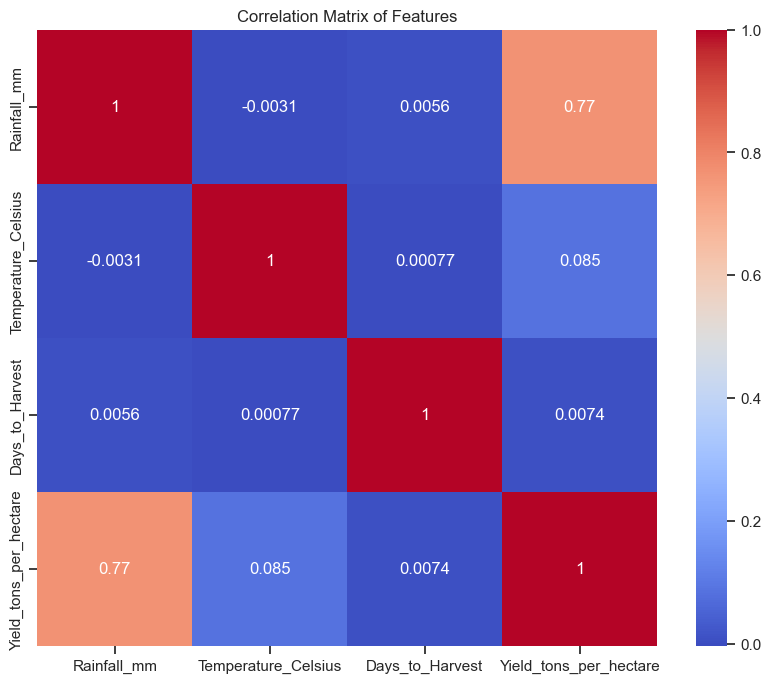

                     Yield_tons_per_hectare
Temperature_Celsius                0.085033
Rainfall_mm                        0.766300


In [21]:
# Print out the column names to see how weather conditions are encoded
print(data_encoded.columns)

# Ensure only numeric columns are used for correlation
non_numeric_cols = data_encoded.select_dtypes(exclude=['float64', 'int64']).columns
data_numeric = data_encoded.drop(columns=non_numeric_cols)

# Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Check specific weather-related correlations with crop yield (replace with correct column names)
weather_columns = ['Temperature_Celsius', 'Rainfall_mm', 'Weather_Condition_Sunny', 'Weather_Condition_Cloudy', 'Weather_Condition_Rainy']  # Update with actual names
weather_columns = [col for col in weather_columns if col in data_numeric.columns]  # Ensure columns exist

weather_correlation = correlation_matrix[['Yield_tons_per_hectare']].loc[weather_columns]

print(weather_correlation)


Interpreting the Results:
Positive Correlation: If variables like Temperature_Celsius, Rainfall_mm, or specific weather conditions (e.g., Weather_Condition_Sunny) have a high positive correlation, they are associated with higher crop yields.
Negative Correlation: If any weather condition has a negative correlation, it may be linked with lower crop yields.
Insights from Regression Coefficients:
After fitting the OLS model, check the regression coefficients for weather conditions. For instance:
A positive coefficient for Temperature_Celsius or Rainfall_mm suggests these factors favor higher yields.
If a weather condition like Weather_Condition_Rainy has a negative coefficient, it might indicate excess rain is detrimental to crop yields.

5. HOW DO THE NUMBER OF DAYS TO HARVEST AFFECT CROP YIELD?

Correlation between Days to Harvest and Crop Yield: 0.007387141622444232


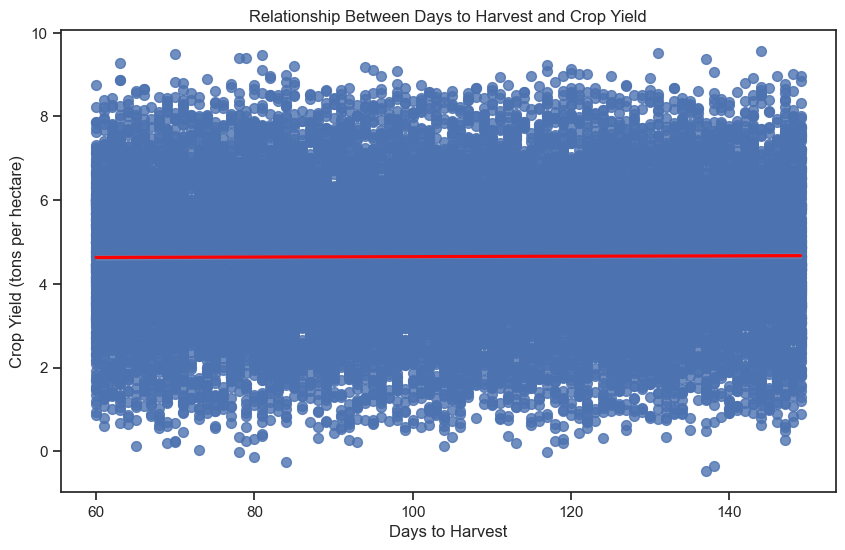

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the relevant columns exist in the dataset and are numeric
if 'Days_to_Harvest' in data_encoded.columns and 'Yield_tons_per_hectare' in data_encoded.columns:
    # Calculate correlation between Days_to_Harvest and Yield_tons_per_hectare
    correlation = data_encoded['Days_to_Harvest'].corr(data_encoded['Yield_tons_per_hectare'])
    print(f"Correlation between Days to Harvest and Crop Yield: {correlation}")
    
    # Plotting the relationship between Days to Harvest and Crop Yield
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Days_to_Harvest', y='Yield_tons_per_hectare', data=data_encoded, scatter_kws={'s':50}, line_kws={'color':'red'})
    plt.title('Relationship Between Days to Harvest and Crop Yield')
    plt.xlabel('Days to Harvest')
    plt.ylabel('Crop Yield (tons per hectare)')
    plt.show()
else:
    print("Either 'Days_to_Harvest' or 'Yield_tons_per_hectare' is not present in the dataset.")


Explanation:
Correlation Calculation: The code calculates the Pearson correlation between Days_to_Harvest and Yield_tons_per_hectare. This tells you how strongly these two variables are linearly related.
Scatter/Regression Plot: A scatter plot with a regression line helps visualize the relationship. The red line indicates the trend, and you can assess if there's a positive, negative, or no significant relationship.
Interpretation:
Positive correlation: More days to harvest generally leads to higher crop yields.
Negative correlation: Fewer days to harvest result in higher yields.
No correlation: No clear linear relationship between the two variables

6. HOW DOES IRRIGATION AFFECT THE CROP YIELD IN DIFFERENT WEATHER CONDITIONS?

  Weather_Condition Irrigation_Used  Yield_tons_per_hectare
0             Rainy              No                4.053488
1             Rainy             Yes                5.259251
2             Sunny              No                4.058963
3             Sunny             Yes                5.256310


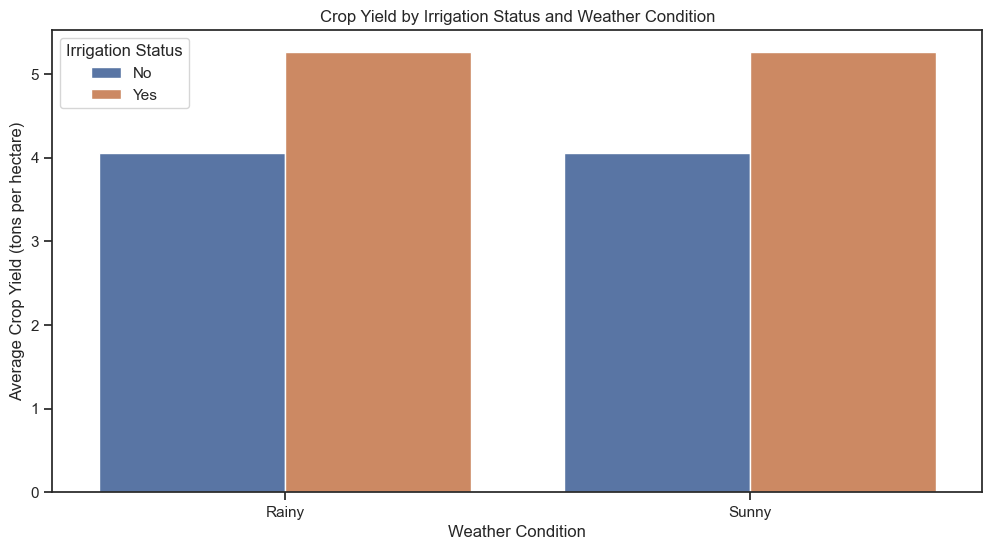

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column to represent weather conditions
data_encoded['Weather_Condition'] = data_encoded[['Weather_Condition_Rainy', 'Weather_Condition_Sunny']].idxmax(axis=1).str.replace('Weather_Condition_', '')

# Create a new irrigation column indicating whether irrigation was used
data_encoded['Irrigation_Used'] = data_encoded['Irrigation_Used_True'].apply(lambda x: 'Yes' if x else 'No')

# Group by the new weather condition and irrigation status, then calculate mean yield
irrigation_weather_yield = data_encoded.groupby(['Weather_Condition', 'Irrigation_Used'])['Yield_tons_per_hectare'].mean().reset_index()

# Print the mean yields for each combination
print(irrigation_weather_yield)

# Plotting the average yield by irrigation status and weather condition
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather_Condition', y='Yield_tons_per_hectare', hue='Irrigation_Used', data=irrigation_weather_yield)
plt.title('Crop Yield by Irrigation Status and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Crop Yield (tons per hectare)')
plt.legend(title='Irrigation Status', loc='upper left')
plt.show()


------------------------------------------------------------------------------------

In [40]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import os
import pickle 
# Importing additional metrics
from sklearn.metrics import mean_absolute_error
import numpy as np

# Function to calculate Adjusted R² score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Load dataset
data = pd.read_csv('dataset/crop_yield.csv')

# Data Preprocessing

# Step 1: Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 2: Remove any leading/trailing spaces from data entries
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Drop rows with missing values (if any)
data.dropna(inplace=True)

# Step 3.1: Identify rows with negative yield values
# negative_yield_rows = data[data['Yield_tons_per_hectare'] < 0]

# # Print the rows with negative yield values
# if not negative_yield_rows.empty:
#     print("Rows with negative Yield_tons_per_hectare:")
#     print(negative_yield_rows)

# Step 3.2: Remove rows with negative yield values
data = data[data['Yield_tons_per_hectare'] >= 0]

# Step 4: Converting categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data = data.sample(frac=0.02, random_state=1)

# Step 5: Defining features (X) and target (y)
X = data.drop(['Yield_tons_per_hectare'], axis=1)
y = data['Yield_tons_per_hectare']

# Step 6: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42)
}

# Function to calculate Adjusted R² score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Function to evaluate models with extended metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])
    
    # Calculate metrics for the train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])
    
    # Return a dictionary with the metrics for both sets
    return {
        'MSE_train': mse_train, 'RMSE_train': rmse_train, 'MAE_train': mae_train, 'R2_train': r2_train, 'Adj_R2_train': adj_r2_train,
        'MSE_test': mse_test, 'RMSE_test': rmse_test, 'MAE_test': mae_test, 'R2_test': r2_test, 'Adj_R2_test': adj_r2_test
    }

# Step 8: Training and evaluating models
for name, model in models.items():
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name}:")
    print(f"  Train: MSE = {results['MSE_train']:.4f}, RMSE = {results['RMSE_train']:.4f}, MAE = {results['MAE_train']:.4f}, R² = {results['R2_train']:.4f}, Adjusted R² = {results['Adj_R2_train']:.4f}")
    print(f"  Test:  MSE = {results['MSE_test']:.4f}, RMSE = {results['RMSE_test']:.4f}, MAE = {results['MAE_test']:.4f}, R² = {results['R2_test']:.4f}, Adjusted R² = {results['Adj_R2_test']:.4f}")


# Optional: Save all models to the model folder
model_folder = 'model'
os.makedirs(model_folder, exist_ok=True)  # Create the model folder if it doesn't exist

# Save each model
for name, model in models.items():
    model_filename = os.path.join(model_folder, f"{name.replace(' ', '_').lower()}_model.pkl")  # Format filename
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"{name} model saved as {model_filename}")



C:\Users\Himanshu\AppData\Local\Temp\ipykernel_18280\730044357.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Linear Regression:
  Train: MSE = 0.2515, RMSE = 0.5015, MAE = 0.4005, R² = 0.9130, Adjusted R² = 0.9130
  Test:  MSE = 0.2435, RMSE = 0.4935, MAE = 0.3939, R² = 0.9153, Adjusted R² = 0.9151
Decision Tree:
  Train: MSE = 0.0000, RMSE = 0.0000, MAE = 0.0000, R² = 1.0000, Adjusted R² = 1.0000
  Test:  MSE = 0.5304, RMSE = 0.7283, MAE = 0.5810, R² = 0.8155, Adjusted R² = 0.8150
Random Forest:
  Train: MSE = 0.0535, RMSE = 0.2313, MAE = 0.1731, R² = 0.9815, Adjusted R² = 0.9815
  Test:  MSE = 0.2999, RMSE = 0.5477, MAE = 0.4359, R² = 0.8957, Adjusted R² = 0.8954
Gradient Boosting:
  Train: MSE = 0.7677, RMSE = 0.8762, MAE = 0.7044, R² = 0.7345, Adjusted R² = 0.7343
  Test:  MSE = 0.7604, RMSE = 0.8720, MAE = 0.7006, R² = 0.7355, Adjusted R² = 0.7349
Linear Regression model saved as model\linear_regression_model.pkl
Decision Tree model saved as model\decision_tree_model.pkl
Random Forest model saved as model\random_forest_model.pkl
Gradient Boosting model saved as model\gradient_boosting_mo

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_18280\1479149441.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


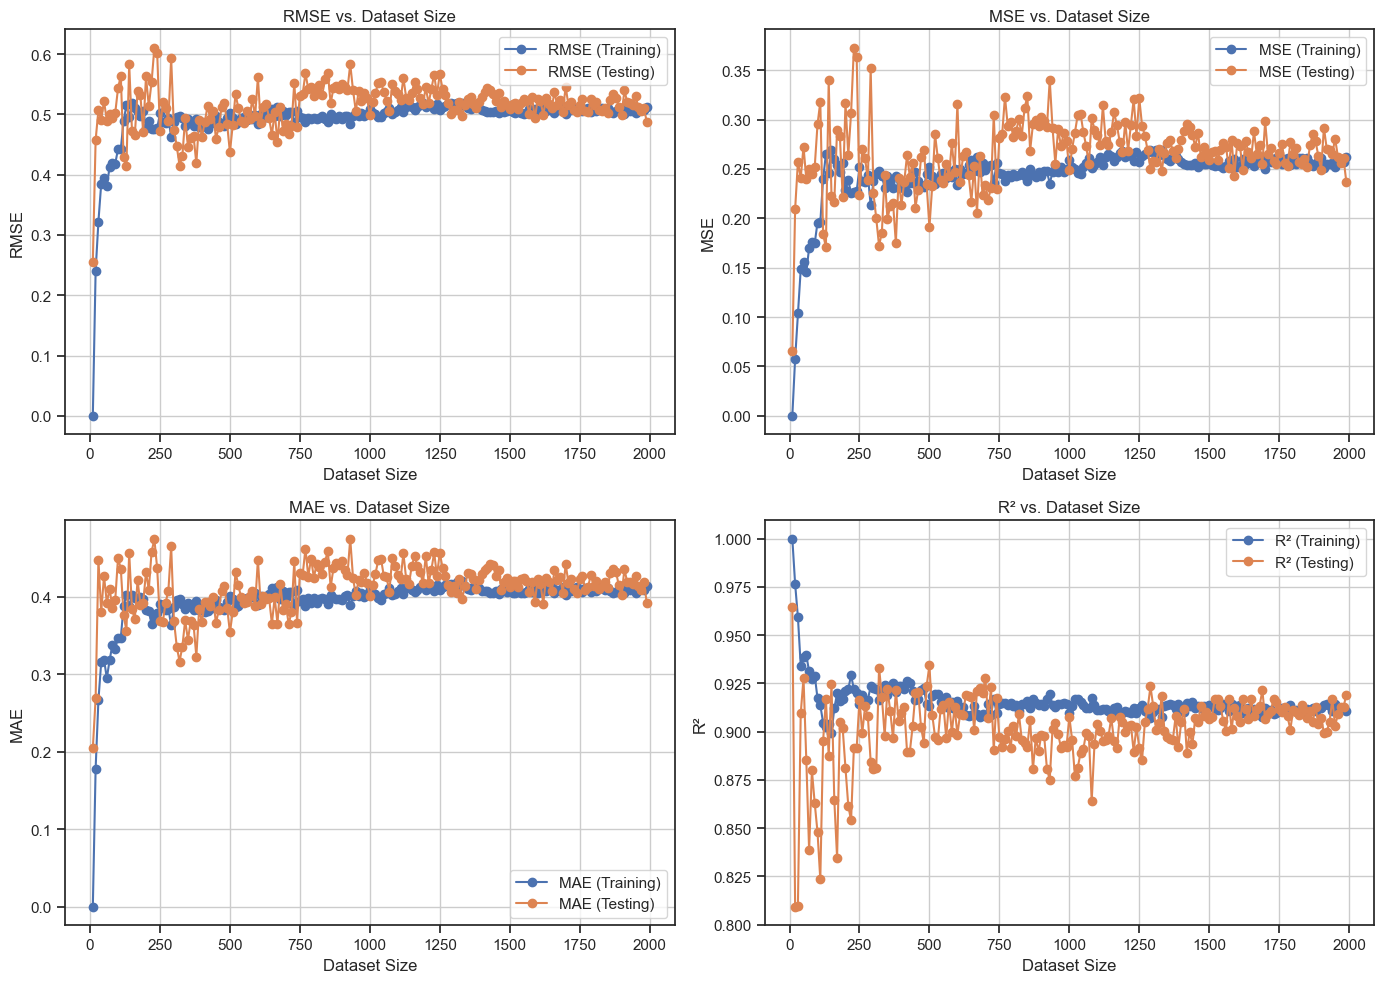

In [39]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Adjusted R² score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Load dataset
data = pd.read_csv('dataset/crop_yield.csv')
data = data.sample(frac=0.002, random_state=1)

# Data Preprocessing
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.dropna(inplace=True)

# Remove rows with negative yield values
data = data[data['Yield_tons_per_hectare'] >= 0]

# Converting categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Store metrics for training and testing
train_sizes = []
rmse_train_list = []
rmse_test_list = []
mse_train_list = []
mse_test_list = []
mae_train_list = []
mae_test_list = []
r2_train_list = []
r2_test_list = []

# Step 8: Training and evaluating models for varying dataset sizes
for size in range(10, len(data), 10):  # Adjust range as needed
    # Sample data
    sampled_data = data.sample(n=size, random_state=1)
    
    # Defining features (X) and target (y)
    X = sampled_data.drop(['Yield_tons_per_hectare'], axis=1)
    y = sampled_data['Yield_tons_per_hectare']
    
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize model
    model = LinearRegression()  # You can also loop through other models if needed

    # Train the model
    model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for train and test
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    train_sizes.append(size)
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

# Plotting metrics vs. Dataset Size
plt.figure(figsize=(14, 10))

# RMSE plot
plt.subplot(2, 2, 1)
plt.plot(train_sizes, rmse_train_list, label='RMSE (Training)', marker='o')
plt.plot(train_sizes, rmse_test_list, label='RMSE (Testing)', marker='o')
plt.title('RMSE vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

# MSE plot
plt.subplot(2, 2, 2)
plt.plot(train_sizes, mse_train_list, label='MSE (Training)', marker='o')
plt.plot(train_sizes, mse_test_list, label='MSE (Testing)', marker='o')
plt.title('MSE vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('MSE')
plt.legend()
plt.grid()

# MAE plot
plt.subplot(2, 2, 3)
plt.plot(train_sizes, mae_train_list, label='MAE (Training)', marker='o')
plt.plot(train_sizes, mae_test_list, label='MAE (Testing)', marker='o')
plt.title('MAE vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('MAE')
plt.legend()
plt.grid()

# R² plot
plt.subplot(2, 2, 4)
plt.plot(train_sizes, r2_train_list, label='R² (Training)', marker='o')
plt.plot(train_sizes, r2_test_list, label='R² (Testing)', marker='o')
plt.title('R² vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('R²')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [41]:
%pip install xgboost lightgbm catboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import os
import pickle 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from tqdm import tqdm  # Progress bar
# Importing additional metrics
from sklearn.metrics import mean_absolute_error
import numpy as np

# Function to calculate Adjusted R² score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Load dataset
data = pd.read_csv('dataset/crop_yield.csv')

# Data Preprocessing

# Step 1: Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 2: Remove any leading/trailing spaces from data entries
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Drop rows with missing values (if any)
data.dropna(inplace=True)

# Step 3.1: Identify rows with negative yield values
# negative_yield_rows = data[data['Yield_tons_per_hectare'] < 0]

# # Print the rows with negative yield values
# if not negative_yield_rows.empty:
#     print("Rows with negative Yield_tons_per_hectare:")
#     print(negative_yield_rows)

# Step 3.2: Remove rows with negative yield values
data = data[data['Yield_tons_per_hectare'] >= 0]

# Step 4: Converting categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data = data.sample(frac=0.02, random_state=1)

# Step 5: Defining features (X) and target (y)
X = data.drop(['Yield_tons_per_hectare'], axis=1)
y = data['Yield_tons_per_hectare']

# Step 6: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize models
models = {
    # 'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Huber Regressor': HuberRegressor(),
    # 'Decision Tree': DecisionTreeRegressor(random_state=42),
    # 'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=10, random_state=42),
    # 'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=10, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Bagging Regressor': BaggingRegressor(n_estimators=50, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=10, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=10, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=10, learning_rate=0.1, depth=6, silent=True),
    'Neural Network (MLP Regressor)': MLPRegressor(hidden_layer_sizes=(10,10), max_iter=50, random_state=42) # 100,100   , 50->500
}

# Function to calculate Adjusted R² score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Function to evaluate models with extended metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])
    
    # Calculate metrics for the train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])
    
    # Return a dictionary with the metrics for both sets
    return {
        'MSE_train': mse_train, 'RMSE_train': rmse_train, 'MAE_train': mae_train, 'R2_train': r2_train, 'Adj_R2_train': adj_r2_train,
        'MSE_test': mse_test, 'RMSE_test': rmse_test, 'MAE_test': mae_test, 'R2_test': r2_test, 'Adj_R2_test': adj_r2_test
    }

# Step 8: Training and evaluating models
for name, model in models.items():
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name}:")
    print(f"  Train: MSE = {results['MSE_train']:.4f}, RMSE = {results['RMSE_train']:.4f}, MAE = {results['MAE_train']:.4f}, R² = {results['R2_train']:.4f}, Adjusted R² = {results['Adj_R2_train']:.4f}")
    print(f"  Test:  MSE = {results['MSE_test']:.4f}, RMSE = {results['RMSE_test']:.4f}, MAE = {results['MAE_test']:.4f}, R² = {results['R2_test']:.4f}, Adjusted R² = {results['Adj_R2_test']:.4f}")


# Optional: Save all models to the model folder
model_folder = 'model'
os.makedirs(model_folder, exist_ok=True)  # Create the model folder if it doesn't exist

# Save each model
for name, model in models.items():
    model_filename = os.path.join(model_folder, f"{name.replace(' ', '_').lower()}_model.pkl")  # Format filename
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"{name} model saved as {model_filename}")



C:\Users\Himanshu\AppData\Local\Temp\ipykernel_18280\869378692.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Ridge Regression:
  Train: MSE = 0.2515, RMSE = 0.5015, MAE = 0.4005, R² = 0.9130, Adjusted R² = 0.9130
  Test:  MSE = 0.2435, RMSE = 0.4935, MAE = 0.3939, R² = 0.9153, Adjusted R² = 0.9151
Lasso Regression:
  Train: MSE = 0.3316, RMSE = 0.5759, MAE = 0.4617, R² = 0.8853, Adjusted R² = 0.8852
  Test:  MSE = 0.3259, RMSE = 0.5709, MAE = 0.4579, R² = 0.8866, Adjusted R² = 0.8864
ElasticNet Regression:
  Train: MSE = 0.3283, RMSE = 0.5729, MAE = 0.4592, R² = 0.8865, Adjusted R² = 0.8864
  Test:  MSE = 0.3228, RMSE = 0.5681, MAE = 0.4558, R² = 0.8877, Adjusted R² = 0.8874


c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Huber Regressor:
  Train: MSE = 0.2528, RMSE = 0.5028, MAE = 0.4013, R² = 0.9126, Adjusted R² = 0.9125
  Test:  MSE = 0.2447, RMSE = 0.4946, MAE = 0.3950, R² = 0.9149, Adjusted R² = 0.9147
Extra Trees:
  Train: MSE = 0.0000, RMSE = 0.0000, MAE = 0.0000, R² = 1.0000, Adjusted R² = 1.0000
  Test:  MSE = 0.3093, RMSE = 0.5561, MAE = 0.4449, R² = 0.8924, Adjusted R² = 0.8922
AdaBoost Regressor:
  Train: MSE = 0.4356, RMSE = 0.6600, MAE = 0.5310, R² = 0.8494, Adjusted R² = 0.8493
  Test:  MSE = 0.4200, RMSE = 0.6481, MAE = 0.5186, R² = 0.8539, Adjusted R² = 0.8535
Support Vector Regressor:
  Train: MSE = 0.0097, RMSE = 0.0984, MAE = 0.0976, R² = 0.9967, Adjusted R² = 0.9967
  Test:  MSE = 2.1841, RMSE = 1.4779, MAE = 1.1989, R² = 0.2401, Adjusted R² = 0.2384
K-Nearest Neighbors:
  Train: MSE = 0.9151, RMSE = 0.9566, MAE = 0.7774, R² = 0.6835, Adjusted R² = 0.6833
  Test:  MSE = 1.3717, RMSE = 1.1712, MAE = 0.9490, R² = 0.5228, Adjusted R² = 0.5217
Bagging Regressor:
  Train: MSE = 0.0405, R

c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
